In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [7]:
df=pd.read_excel('weather dataset for uk.xlsx')
df.head()

,Region,Year,Month,Avg Temp,Max Temp,Min Temp,Temp Def,Humidity,Total Death
0,East of England,2012,1,3.2,6.1,0.3,5.8,87,2
1,East of England,2012,2,4.1,7.4,0.8,6.6,83,0
2,East of England,2012,3,6.9,11.2,2.5,8.7,78,0
3,East of England,2012,4,8.5,12.8,4.1,8.7,76,0
4,East of England,2012,5,11.9,16.5,7.3,9.2,72,0


In [9]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '', regex=False)
# Convert categorical 'region' and 'weather' to dummy variables
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

# Display the cleaned and encoded DataFrame columns
df_encoded.columns

Index(['year', 'month', 'avg_temp', 'max_temp', 'min_temp', 'temp_def',
       'humidity', 'total_death', 'region_East of England', 'region_London',
       'region_North East', 'region_North West', 'region_Scotland',
       'region_South East', 'region_South West', 'region_Wales',
       'region_West Midlands', 'region_Yorkshire and The Humber'],
      dtype='object')

In [33]:
df.head()

,region,year,month,avg_temp,max_temp,min_temp,temp_def,humidity,total_death
0,East of England,2012,1,3.2,6.1,0.3,5.8,87,2
1,East of England,2012,2,4.1,7.4,0.8,6.6,83,0
2,East of England,2012,3,6.9,11.2,2.5,8.7,78,0
3,East of England,2012,4,8.5,12.8,4.1,8.7,76,0
4,East of England,2012,5,11.9,16.5,7.3,9.2,72,0


In [15]:
df_new=df.drop(columns=['region','year','month'])
df_new.head()

,avg_temp,max_temp,min_temp,temp_def,humidity,total_death
0,3.2,6.1,0.3,5.8,87,2
1,4.1,7.4,0.8,6.6,83,0
2,6.9,11.2,2.5,8.7,78,0
3,8.5,12.8,4.1,8.7,76,0
4,11.9,16.5,7.3,9.2,72,0


In [17]:
df_new.corr()['total_death']

avg_temp       0.045915
max_temp       0.042372
min_temp       0.049784
temp_def       0.013865
humidity       0.002130
total_death    1.000000
Name: total_death, dtype: float64

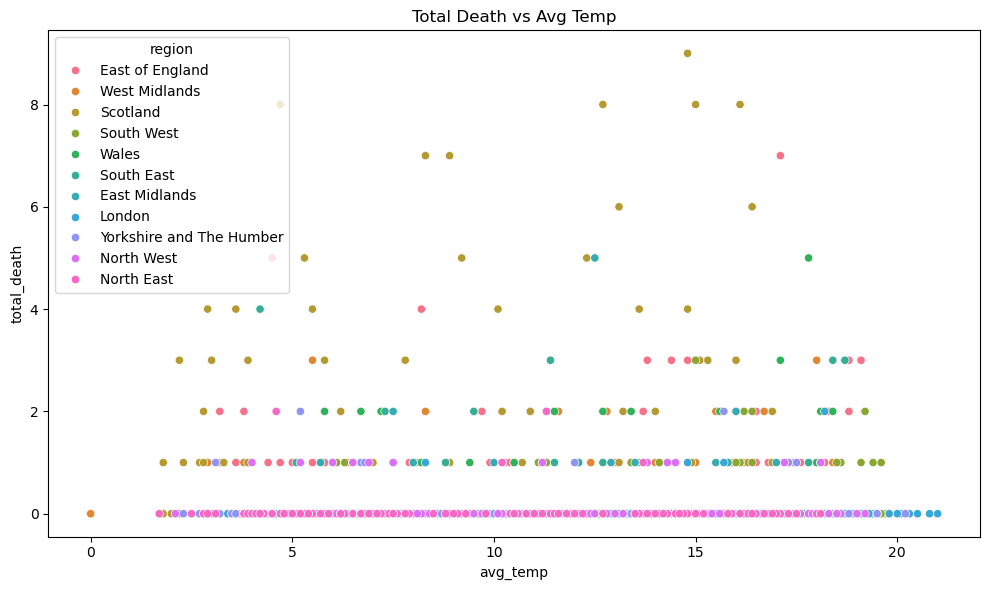

In [131]:
# 4. Total Death vs Avg_Temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='total_death', hue='region', data=df)
plt.title('Total Death vs Avg Temp')
plt.tight_layout()
plt.show()


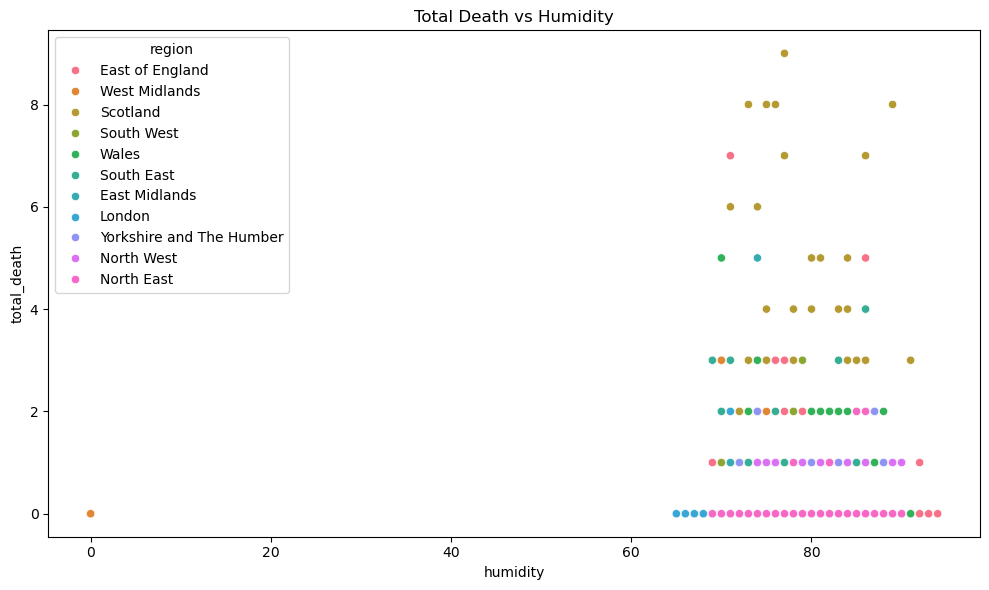

In [129]:
# 4. Total Death vs Avg_Temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='total_death', hue='region', data=df)
plt.title('Total Death vs Humidity')
plt.tight_layout()
plt.show()


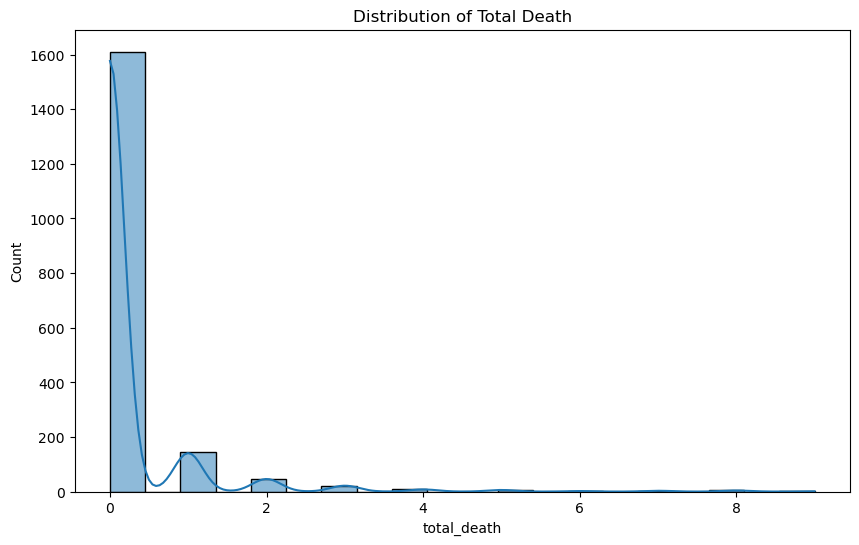

In [34]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_new['total_death'], bins=20, kde=True)
plt.title('Distribution of Total Death')
plt.show()

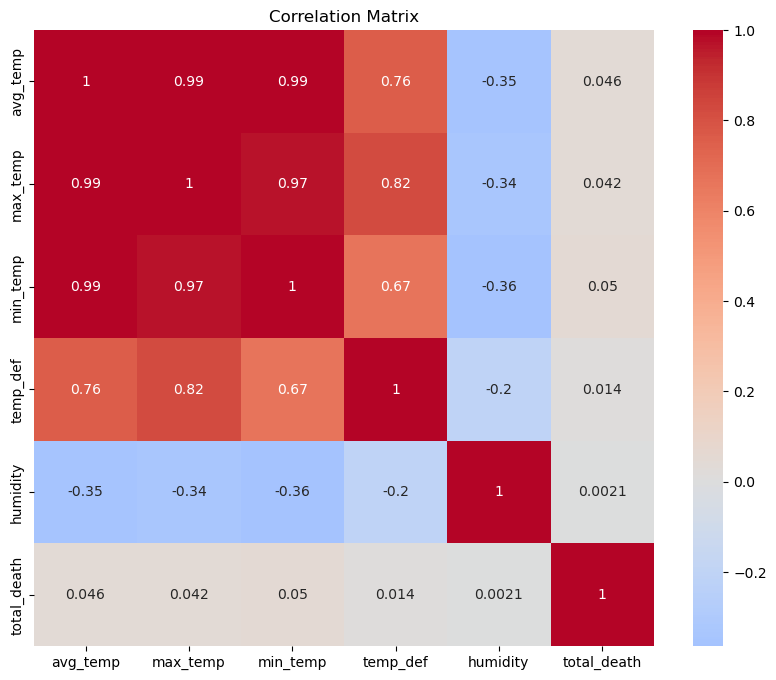

In [36]:
# Correlation matrix
corr_matrix = df_new.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [40]:
df_np=df_new.to_numpy()
df_np.shape

(1848, 6)

In [44]:
X_train, Y_train=df_np[:,:5],df_np[:,-1]
X_train.shape, Y_train.shape

((1848, 5), (1848,))

In [62]:
from sklearn.linear_model import LinearRegression

sklearn_model=LinearRegression().fit(X_train,Y_train)
sklearn_Y_predictions= sklearn_model.predict(X_train)
sklearn_Y_predictions

array([0.17457781, 0.16027346, 0.18683729, ..., 0.25972159, 0.25217197,
       0.22612921])

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(sklearn_Y_predictions,Y_train), mean_squared_error(sklearn_Y_predictions,Y_train)

(0.41220664574253996, 0.6788172239927485)

In [68]:
predictions_df=pd.DataFrame({'avg_temp':df_new['avg_temp'],
                             'humidity':df_new['humidity'],
                             'total_death':df_new['total_death'],
                             'sklearn_deathpredic':sklearn_Y_predictions}
    
)
predictions_df.head()

,avg_temp,humidity,total_death,sklearn_deathpredic
0,3.2,87,2,0.174578
1,4.1,83,0,0.160273
2,6.9,78,0,0.186837
3,8.5,76,0,0.208430
4,11.9,72,0,0.197039


In [112]:
# Prepare data for modeling
X = df_new[['avg_temp', 'max_temp', 'min_temp', 'humidity']]
y = df_new['total_death']

# Add constant for statsmodels (intercept term)
X_sm = sm.add_constant(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# Standardize features (optional but often helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Evaluation:
Mean Absolute Error: 0.41
Mean Squared Error: 0.55
R-squared: -0.00


In [114]:
# Using statsmodels for detailed statistics
sm_model = sm.OLS(y, X_sm).fit()
print("\nRegression Summary:")
print(sm_model.summary())


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            total_death   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.757
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.135
Time:                        20:46:12   Log-Likelihood:                -2264.2
No. Observations:                1848   AIC:                             4538.
Df Residuals:                    1843   BIC:                             4566.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0818      0.20

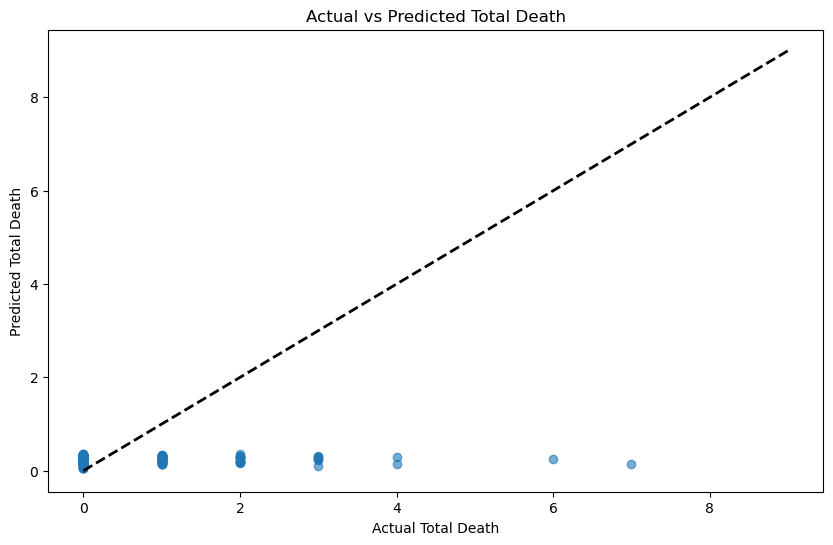

In [116]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Total Death')
plt.ylabel('Predicted Total Death')
plt.title('Actual vs Predicted Total Death')
plt.show()

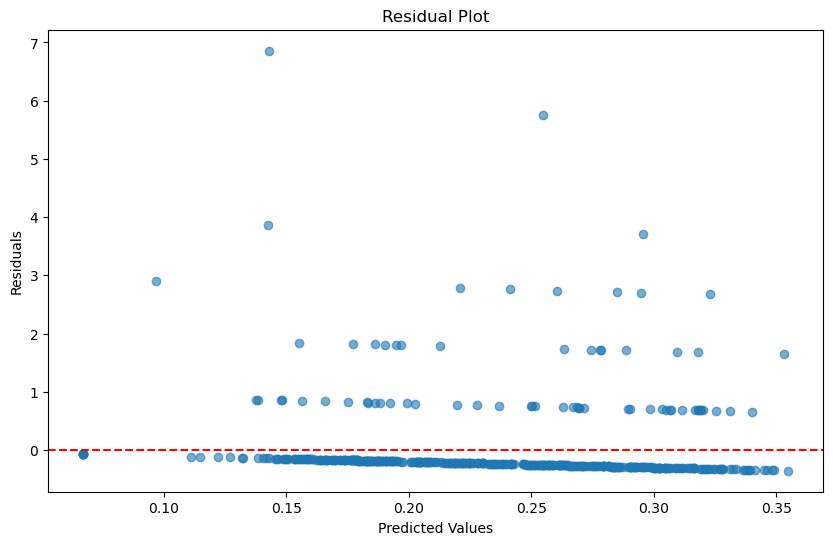

In [118]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [122]:
# Standardize features (optional but often helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled

(array([[-0.89922723, -0.94058318, -0.8307935 ,  1.64737327],
        [ 0.86399126,  0.89460355,  0.81049311, -0.11968437],
        [ 0.31042267,  0.44480288,  0.13053151, -0.56144878],
        ...,
        [ 1.13052429,  1.34440422,  0.83394006, -1.22409539],
        [-0.89922723, -0.97656723, -0.78389959,  0.76384445],
        [-1.35028312, -1.37239182, -1.29973253,  1.20560886]]),
 array([[ 1.08951921,  0.94857963,  1.25598518, -0.00924327],
        [ 1.27404208,  1.21846003,  1.32632604, -1.00321319],
        [ 1.72509797,  1.63227665,  1.81871202, -0.56144878],
        ...,
        [ 0.8844938 ,  1.03853977,  0.6698114 , -0.89277209],
        [-1.16576026, -1.19247155, -1.11215691,  0.76384445],
        [-1.10425264, -1.13849547, -1.04181606,  1.09516776]]))